# Data Pre-Processing

#### Import Packages and CSV

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option("display.max_columns", None)
# Create Dataframe
df = pd.read_csv(r"./data/Visadataset.csv")
# Print shape of dataset
print(df.shape)

(25480, 12)


## Data Cleaning

### Handling Missing values

* Handling Missing values 
* Handling Duplicates
* Check data type
* Understand the dataset

#### Check Null Values

In [2]:
##these are the features with nan value
features_with_na=[features for features in df.columns if df[features].isnull().sum()>=1]
for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean()*100,5), '% missing values')

* **There are no null values in the dataset**

### 3.2 Other Data Cleaning steps

**Handling Duplicates**

In [3]:
df.duplicated().sum()

0

* **No Duplicates in the dataset**

**Remove case_id from the dataset as it cannot used in Model Training**

In [4]:
df.drop('case_id', inplace=True, axis=1)

# Feature Engineering

## Feature Extraction

In [5]:
# importing date class from datetime module
from datetime import date
  
# creating the date object of today's date
todays_date = date.today()
current_year= todays_date.year

**Subtract current year with year of estab to get company's age**

In [6]:
df['company_age'] = current_year-df['yr_of_estab']

In [7]:
df

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,company_age
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,15
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,20
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,14
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,125
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,17
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified,14
25476,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified,16
25477,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified,112
25478,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified,135


In [8]:
df.drop('yr_of_estab', inplace=True, axis=1)

### Type of Features

**Numeric Features**

In [9]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))

Num of Numerical Features : 3


**Categorical Features**

In [10]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))

Num of Categorical Features : 8


**Discrete features**

In [11]:
discrete_features=[feature for feature in num_features if len(df[feature].unique())<=25]
print('Num of Discrete Features :',len(discrete_features))

Num of Discrete Features : 0


**Continues Features**

In [12]:
continuous_features=[feature for feature in num_features if feature not in discrete_features]
print('Num of Continuous Features :',len(continuous_features))

Num of Continuous Features : 3


**Manual encoding target column**

In [13]:
df['case_status']= np.where(df.case_status == 'Denied', 1,0)

### Split X and Y

* **Split Dataframe to X and y**
* **Here we set a variable X i.e, independent columns, and a variable y i.e, dependent column as the “ProdTaken” column.**


In [14]:
X = df.drop('case_status', axis=1)
y = df['case_status']

## Feature Transformation

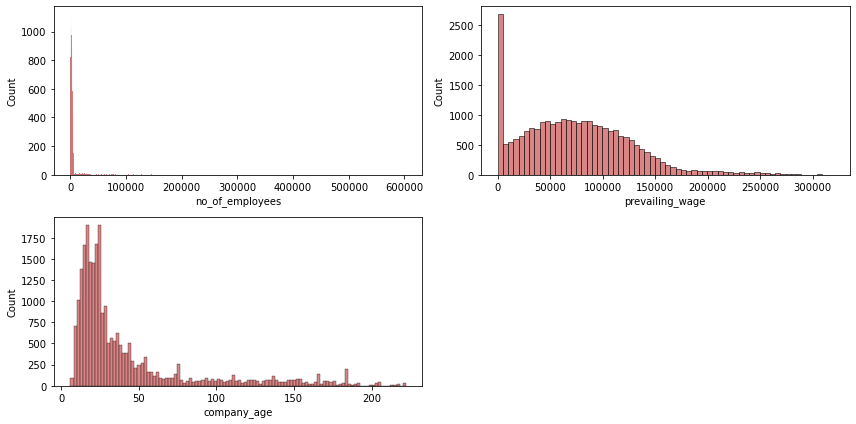

In [15]:
# distribution of data before scaling
plt.figure(figsize=(12, 6))
for i, col in enumerate(['no_of_employees','prevailing_wage','company_age']):
    plt.subplot(2, 2, i+1)
    sns.histplot(x=X[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

* No of employees and Copmany age column is skewed

**Checking Skewness**

**What is Skewness ?**

* Skewness refers to a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution, in a set of data. If the curve is shifted to the left or to the right, it is said to be skewed. Skewness can be quantified as a representation of the extent to which a given distribution varies from a normal distribution. A normal distribution has a skew of zero

In [16]:
X[continuous_features].skew(axis=0, skipna=True)

no_of_employees    12.265260
prevailing_wage     0.755776
company_age         2.037301
dtype: float64

- Positiviely Skewed : company_age, no_of_employees

## Feature Encoding and Scaling

 **One Hot Encoding for Columns which had lesser unique values and not ordinal**
* One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

**Ordinal Encoding for Columns which has many unique categories** 
* Ordinal encoding is used here as label encoder is supported for column transformer.
* Ordinal encoding is used for Ordinal Variable. Variable comprises a finite set of discrete values with a ranked ordering between values.

**Standard Scaler** 
* Standardize features by removing the mean and scaling to unit variance.

**Power Transformer**
* Power transforms are a technique for transforming numerical input or output variables to have a Gaussian or more-Gaussian-like probability distribution.

**Selecting number features for preprocessing**

In [17]:
num_features = list(X.select_dtypes(exclude="object").columns)

**Preprocessing using Column Transformer**

In [18]:
# Create Column Transformer with 3 types of transformers
or_columns = ['has_job_experience','requires_job_training','full_time_position','education_of_employee']
oh_columns = ['continent','unit_of_wage','region_of_employment']
transform_columns= ['no_of_employees','company_age']

from sklearn.preprocessing import OneHotEncoder, StandardScaler,OrdinalEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()
ordinal_encoder = OrdinalEncoder()

transform_pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('transformer', PowerTransformer())
])

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, oh_columns),
        ("Ordinal_Encoder", ordinal_encoder, or_columns),
        ("Transformer", transform_pipe, transform_columns),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)

In [19]:
X = preprocessor.fit_transform(X)

# Classification

In [20]:
from imblearn.combine import SMOTETomek, SMOTEENN

# Resampling the minority class. The strategy can be changed as required.
smt = SMOTEENN(random_state=42,sampling_strategy='minority' )
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X, y)

## Train Test Split
- The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model.

- It is a fast and easy procedure to perform, the results of which allow you to compare the performance of machine learning algorithms.

In [21]:
from sklearn.model_selection import  train_test_split
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((13805, 24), (3452, 24))

## Model Training 

In [22]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [23]:
def evaluate_clf(true, predicted):
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc

In [24]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(), 
     "CatBoosting Classifier": CatBoostClassifier(verbose=False),
     "Support Vector Classifier": SVC(),
    "AdaBoost Classifier": AdaBoostClassifier()
}

accuracy_list=[]
models_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy, model_train_f1,model_train_precision,\
    model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred) 


    # Test set performance
    model_test_accuracy,model_test_f1,model_test_precision,\
    model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)

    print(list(models.keys())[i])
    models_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1)) 
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
    accuracy_list.append(model_test_accuracy)


    print('='*35)
    print('\n')

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9551
- F1 score: 0.9593
- Precision: 0.9550
- Recall: 0.9636
- Roc Auc Score: 0.9542


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9284
- F1 score: 0.9351
- Precision: 0.9309
- Recall: 0.9393
- Roc Auc Score: 0.9273


Gradient Boosting
Model performance for Training set
- Accuracy: 0.8919
- F1 score: 0.9010
- Precision: 0.8964
- Recall: 0.9056
- Roc Auc Score: 0.8905
----------------------------------
Model performance for Test set
- Accuracy: 0.8882
- F1 score: 0.8982
- Precision: 0.8973
- Recall: 0.8992
- Roc Auc Score: 0.8870


Logistic Regression
Model performance for Training 

## Model report as DataFrame

**Results of All Models**

In [25]:
Results = pd.DataFrame(list(zip(models_list, accuracy_list)), columns=['Model Name', 'Accuracy_score'])
Results.sort_values(by=["Accuracy_score"],ascending=False)

,Model Name,Accuracy_score
0,Random Forest,0.955098
5,XGBClassifier,0.933372
4,K-Neighbors Classifier,0.932503
6,CatBoosting Classifier,0.929316
1,Decision Tree,0.928447
2,Gradient Boosting,0.888181
7,Support Vector Classifier,0.869930
8,AdaBoost Classifier,0.850521
3,Logistic Regression,0.742468


**Here we can use Random Forest for Hyper Parameter Tuning**

**Define the parameter distribution for Random forest**

In [26]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['log2', 'sqrt', None]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
criterion = ["gini", "entropy", "log_loss"]
# Create the random grid
rf_params = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'criterion': criterion}

**Create a function for model training and report which can be used in hyperparameter tuning loop**

In [31]:
from sklearn.model_selection import RandomizedSearchCV
random = RandomizedSearchCV(estimator=RandomForestClassifier(),
                                   param_distributions=rf_params,
                                   n_iter=50,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
random.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['log2', 'sqrt', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   verbose=2)

In [32]:
best_params = random.best_params_
rf=RandomForestClassifier(**best_params, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

model_test_accuracy,model_test_f1,model_test_precision,model_test_recall,model_test_rocauc_score= evaluate_clf(y_test, y_pred)

print('Model performance for Test set')
print('- Accuracy: {:.4f}'.format(model_test_accuracy))
print('- F1 score: {:.4f}'.format(model_test_f1))
print('- Precision: {:.4f}'.format(model_test_precision))
print('- Recall: {:.4f}'.format(model_test_recall))
print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

Model performance for Test set
- Accuracy: 0.9505
- F1 score: 0.9550
- Precision: 0.9527
- Recall: 0.9572
- Roc Auc Score: 0.9497


## Best Model is Random Forest with Accuracy 95.63%